### Imports

In [1]:
"""from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks  """

"from google.colab import drive\ndrive.mount('/content/drive')\n%cd /content/drive/My\\ Drive/Colab\\ Notebooks  "

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from datetime import datetime

from IPython.display import display
pd.options.display.max_columns = 25

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import time

os.getcwd()

'/Users/federicofrancone/Desktop/ADT_project/new_data'

In [544]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']


def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

#os.chdir('./Zeta Global/Insurance')
#os.getcwd()

##### Getting Raw Data faster

In [580]:
initial_path= '/Users/federicofrancone/Desktop/ADT_project/new_data/'

os.chdir(initial_path)

merged_train= pd.read_csv('adt_df_train_pre_binning.csv')
merged_test= pd.read_csv('adt_df_test_pre_binning.csv')

merged_train.shape, merged_test.shape #(78436, 948)

((78436, 948), (33613, 948))

In [282]:
#check= pd.read_csv('../adt_data_pawan/df_train_binning_high_mod.csv')
#sum(merged_train['email_address_md5'] == check['email_address_md5'])

In [584]:
### Naming convention
binned_train= merged_train.copy()
binned_test= merged_test.copy()

del merged_train, merged_test

In [585]:
###### Target Distribution #######

target= binned_train['target']
target_test= binned_test['target']

target_distribution= round(target.value_counts()*100/len(binned_train),2)
target_distribution

0    82.69
1    17.31
Name: target, dtype: float64

##### New columns analysis for Report

In [272]:
def report_zcodes(x):
    
    diz={}
    diz['Conversions Rate']= x['target'].value_counts(normalize= True).loc[1]
    diz['Total']= len(x)
    diz['n_Conversions']= x['target'].value_counts(normalize= False).loc[1]
    
    return pd.Series(diz)

In [275]:
imputed_zcodes.head()

,target,z424,z82,z208,z387,z324,z232,z439,z345,z410,z395,z194,...,z531,z364,z261,z498,z52,z178,z87,z374,z319,z26,z257,z264
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
### FOR ZCODES

run_cell= True
df= imputed_zcodes

if run_cell:

    relevant_zcodes= ['z231', 'z239', 'z433', 'z437']
    zcodes_analysis= df[relevant_zcodes + ["target"]]

    for i, zcode in enumerate(relevant_zcodes):
        #print('iteration:', i)
        if i==0:
            writer = pd.ExcelWriter(path= '/Users/federicofrancone/Desktop/ADT_project/zcodes_conv_rate.xlsx', mode='w')
        else:
            writer.mode= "a"

        zcodes_analysis[zcode] = zcodes_analysis[zcode].apply(lambda x: 1 if x>0 else 0)
        to_write= zcodes_analysis.groupby(zcode).apply(report_zcodes)

        to_write.to_excel(writer, startrow= i*5)

    writer.save()
    writer.close()




    # describe= zcodes_analysis.describe(percentiles= [0.5, 0.75, 0.9, 0.95, 0.99])

    # min_zcode = describe['z230'].loc['min']
    # max_zcode = describe['z230'].loc['max']

    # intervals= np.linspace(min_zcode, max_zcode, 5)
    # intervals

In [13]:
### FOR ANY VARIABLE

run_cell= True

if run_cell:


    ###### ibe9350
    relevant_zcodes= ["ibe9350"]
    zcodes_analysis= raw_train[relevant_zcodes + ["target"]]

    zcodes_analysis[relevant_zcodes]= zcodes_analysis[relevant_zcodes].fillna('Mising')

    for i, zcode in enumerate(relevant_zcodes):
        #print('iteration:', i)
        if i==0:
            writer = pd.ExcelWriter(path= '../../../../ibe93650_report.xlsx', mode='w')
        else:
            writer.mode= "a"

        #zcodes_analysis[zcode] = zcodes_analysis[zcode].apply(lambda x: 1 if x>0 else 0)
        to_write= zcodes_analysis.groupby(zcode).apply(report_zcodes)
        to_write.sort_values(by= 'Conversions Rate', inplace= True)

        to_write.to_excel(writer, startrow= i*5)

    writer.save()
    writer.close()

### Starting Normal Script

In [586]:
binned_train.head(3)

,Unnamed: 0,email_address_md5,target,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2802_ita_score_zip_plus4_aggregate_ita_score,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_arts_or_cultural,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,...,z531,z364,z261,z498,z52,z178,z87,z374,z319,z26,z257,z264
0,1,f43783ee3a4e3e40e034fe4cbaafd63e,0,Rural,13B Working Households,I,KY,613.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,34c6fe5c95a9e55b3de574a5a3840dee,0,Downtown Metro,06X Working & Studying,I,CA,740.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,668a21a7246f3196231b17c64dcbb74b,0,City & Surrounds,NaN,I,NY,795.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [587]:
binned_train.isna().sum().sum() #272874

902458

### Lowering all categories ###

In [629]:
for col in binned_train.select_dtypes(include= object).columns:
    binned_train[col]= binned_train[col].apply(lambda x: x.lower() if type(x)== str else x)
    binned_test[col]= binned_test[col].apply(lambda x: x.lower() if type(x)== str else x)
    
binned_train.head(3)

,target,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2802_ita_score_zip_plus4_aggregate_ita_score,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_arts_or_cultural,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_environment_or_wildlife,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_health,...,z531,z364,z261,z498,z52,z178,z87,z374,z319,z26,z257,z264
0,0,rural,13b working households,i,ky,613.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,downtown metro,06x working & studying,i,ca,740.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,city & surrounds,missing,i,ny,795.0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Handling Missing Values: just counting them here ###

In [630]:
###################### NaN values ########################
nan_per_col= {}
for col in binned_train.columns:
    nan_per_col[col]= binned_train[col].isna().sum()
    
nan_per_col= pd.Series(nan_per_col).sort_values(ascending= False)/len(binned_train)

nan_per_col.iloc[:10]   #ok

z264                                                                       0.0
z345                                                                       0.0
cpg_spending_propensities_alcohol_variables                                0.0
cpg_product_propensities_shampoo_variables                                 0.0
cpg_product_propensities_sanitary_napkins_variables                        0.0
cpg_product_propensities_pets_variables                                    0.0
cpg_product_propensities_perfume_and_cologne_for_women_variables           0.0
cpg_product_propensities_pantiliners_variables                             0.0
cpg_product_propensities_meal_dietary_weight_loss_supplements_variables    0.0
cpg_product_propensities_liquor_non_lux_variables                          0.0
dtype: float64

In [631]:
binned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 641 entries, target to z264
dtypes: float64(534), int64(98), object(9)
memory usage: 383.6+ MB


In [632]:
if binned_train.select_dtypes(exclude= object).isna().sum().sum() != 0:
    print('YOU HAVE TO HANDLE MISSING VALUES FOR NUMERICAL FEATS')
else:
    print('THERE ARE NO MISSING IN NUMERICAL FEATURES')

THERE ARE NO MISSING IN NUMERICAL FEATURES


In [633]:
for col in binned_train.select_dtypes(include= object):
    binned_train[col].fillna('missing', inplace= True)

In [634]:
###################### Real NaN in 'cat variables', filled with 'Missing' ########################
# binned_train.replace('missing', np.nan, inplace= True)
not_managed = []

missing_per_col= {}
for col in binned_train.select_dtypes(include= object):
    #nd[col]= round(binned_train[binned_train[col]== 'Missing'].shape[0]*100/ binned_train.shape[0], 2)
    try:
        missing_per_col[col]= round(binned_train[col].apply(
                        lambda x: x.count('missing') if type(x)==str else 0).sum()/ binned_train.shape[0], 2)
    except:
        not_managed.append(col)
        pass
    
    
missing_per_col= pd.Series(missing_per_col).sort_values(ascending= False)
missing_per_col.head()

ibe2360                 0.82
ibe8637                 0.56
ibe8531                 0.45
acxiom_cluster_group    0.33
ibe8609                 0.30
dtype: float64

In [635]:
not_managed

[]

In [636]:
missing_per_col.describe()

count    9.000000
mean     0.347778
std      0.226869
min      0.160000
25%      0.160000
50%      0.300000
75%      0.450000
max      0.820000
dtype: float64

In [637]:
### Taking off the ones having number of missing values > threshold

thresh_na= 0.9

cols_to_drop = list(missing_per_col[missing_per_col>= thresh_na].index)
binned_train.drop(cols_to_drop, inplace= True, axis= 1)

binned_train.shape  #(96399, 481)

(78436, 641)

In [638]:
#### Converting object columns into numerics when possible

for col in binned_train.select_dtypes(include= object):
    try:
        binned_train[col] = binned_train[col].astype('float64')
    except:
        pass

In [639]:
binned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 641 entries, target to z264
dtypes: float64(534), int64(98), object(9)
memory usage: 383.6+ MB


#### Handling Missing Values with median (for numerical data) and 'Missing' string for object data

In [640]:
binned_train.select_dtypes(include= object).sample(5)

,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2360,ibe8531,ibe8609,ibe8637,ibe8642
10268,city & surrounds,missing,i,md,missing,d,m,1,q
46983,city & surrounds,missing,i,il,missing,v,m,z,j
23181,missing,missing,i,missing,e059,d,missing,5,missing
40887,city & surrounds,20s community minded,i,me,e035,d,m,1,j
69353,city & surrounds,05x busy households,i,sc,missing,missing,s,missing,a


In [641]:
## For categorical columns I put missing

#for col in binned_train.select_dtypes(include= object).columns:
    #binned_train[col]= binned_train[col].fillna('Missing')

In [642]:
#binned_train.select_dtypes(include= object).sample(5)

In [643]:
print(binned_train.shape[1], len(binned_train.select_dtypes(include= 'number').columns), 
      len(binned_train.select_dtypes(include= object).columns))

641 632 9


### Binary Features in 0-1

In [644]:
binary_feats= []
for col in binned_train.columns:
    if binned_train[col].nunique()== 2:
        binary_feats.append(col)

len(binary_feats)

98

In [645]:
###### filling with mean/median for numerical variables ####
for col in binned_train.select_dtypes(exclude= object).columns:
    binned_train[col]= binned_train[col].apply(lambda x: np.nan if x== 'missing' else x)
    
    if col in binary_feats:
        binned_train[col]= binned_train[col].fillna(binned_train[col].mean())
    else:
        binned_train[col]= binned_train[col].fillna(binned_train[col].median())  #valuta se aggiungere un po di noise

In [646]:
binned_train.isna().sum().sum() 

0

In [647]:
binned_train.drop(binned_train.isna().sum()[binned_train.isna().sum() > 0].index.tolist(), axis=1, inplace= True)

binned_train.isna().sum().sum() 

0

#### Degree of index (n° of different values per column)

In [648]:
binned_train.select_dtypes(include= object).sample(3)

,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2360,ibe8531,ibe8609,ibe8637,ibe8642
69541,downtown metro,21s leisure seekers,i,sc,missing,missing,m,8,e
40959,city & surrounds,02y taking hold,missing,ca,missing,missing,missing,missing,n
69789,city & surrounds,05x busy households,i,ia,missing,missing,s,missing,g


In [649]:
degree_id_per_cat= {}

for col in binned_train.select_dtypes(include= object).columns: #only relevant to object types
    degree_id_per_cat[col]= binned_train[col].nunique()
    
degree_id_per_cat= pd.Series(degree_id_per_cat).sort_values(ascending= False)/len(binned_train)

degree_id_per_cat.describe(percentiles= [0.1, 0.5, 0.9])  #maximum 7 different categories, they could be One Hot Encoded

count    9.000000
mean     0.000499
std      0.000869
min      0.000038
10%      0.000059
50%      0.000242
90%      0.001081
max      0.002754
dtype: float64

### Removing (almost) costants and index columns ####

In [650]:
threshold_index= 0.95  #if a catgorical columns has at 95% all different values, then it is almost an index --> drop

binned_train= binned_train.drop(list((degree_id_per_cat[degree_id_per_cat >= threshold_index ]).index), axis=1, errors= 'ignore')
binned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 641 entries, target to z264
dtypes: float64(534), int64(98), object(9)
memory usage: 383.6+ MB


In [651]:
degree_id_per_cont= {}   #for numerical variables

for col in binned_train.select_dtypes(include= 'number').columns: #only relevant to object types
    degree_id_per_cont[col]= binned_train[col].nunique()
    
degree_id_per_cont= pd.Series(degree_id_per_cont).sort_values(ascending= False)/len(binned_train)

degree_id_per_cont.describe(percentiles= [0.1, 0.5, 0.9])  #maximum 7 different categories, they could be One Hot Encoded

count    632.000000
mean       0.004895
std        0.034293
min        0.000025
10%        0.000025
50%        0.001307
90%        0.007216
max        0.596537
dtype: float64

In [652]:
threshold_index= 1  #if a continuos columns has at 90% all different values, then it is almost an index --> drop

binned_train= binned_train.drop(list((degree_id_per_cont[degree_id_per_cont >= threshold_index ]).index), axis=1, errors= 'ignore')
binned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 641 entries, target to z264
dtypes: float64(534), int64(98), object(9)
memory usage: 383.6+ MB


In [653]:
binned_train.head(3)

,target,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2802_ita_score_zip_plus4_aggregate_ita_score,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_arts_or_cultural,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_environment_or_wildlife,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_health,...,z531,z364,z261,z498,z52,z178,z87,z374,z319,z26,z257,z264
0,0,rural,13b working households,i,ky,613.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,downtown metro,06x working & studying,i,ca,740.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,city & surrounds,missing,i,ny,795.0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Degree of Constancy ####

In [654]:
binned_train.columns

Index(['target', 'urbanity', 'acxiom_cluster_group',
       'ibe8627_age_input_individual_default_to_1st_individual_premier_flag',
       'cass_state', 'ibe2802_ita_score_zip_plus4_aggregate_ita_score',
       'ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable',
       'ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare',
       'ibe2076_ibe_premier_socialconcerncausessupportedfinancially_arts_or_cultural',
       'ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens',
       ...
       'z261', 'z498', 'z52', 'z178', 'z87', 'z374', 'z319', 'z26', 'z257',
       'z264'],
      dtype='object', length=641)

In [655]:
percentage_constant= {}

for col in binned_train.columns:
    percentage_constant[col]= (binned_train[col].value_counts()/len(binned_train)).values.max()
    
percentage_constant = pd.Series(percentage_constant).sort_values(ascending= False)

perc_const_describe= percentage_constant.describe(percentiles= [0.1, 0.3, 0.5, 0.7, 0.9])  #maximum 7
perc_const_describe

count    641.000000
mean       0.719186
std        0.353653
min        0.084974
10%        0.201655
30%        0.284461
50%        0.973596
70%        0.994913
90%        0.998674
max        0.999567
dtype: float64

### <font color= 'blue'> Elbow Curve: number of columns removed at varying the constancy threshold

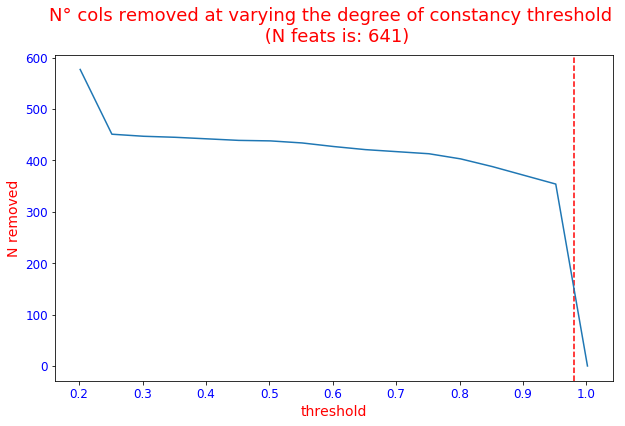

In [656]:
l= []
thresholds= np.arange(perc_const_describe.loc['10%'], perc_const_describe.loc['max'] +0.01, 0.05)

for thresh in thresholds: 
    l.append(len(percentage_constant[percentage_constant >= thresh]))
    
title_ticks_ecc('N° cols removed at varying the degree of constancy threshold \n (N feats is: {})'.format(
                            len(binned_train.columns)), 'threshold', 'N removed')

plt.axvline(0.98, c= 'red', ls= '--')
plt.plot(thresholds, l)

### <font color= 'blue'> Setting threshold of degree of constancy above which column is removed

In [657]:
threshold_const= 0.98   # this dataset is big

len(percentage_constant[percentage_constant>= threshold_const])

303

In [658]:
const_to_drop = percentage_constant[percentage_constant>= threshold_const].index

binned_train= binned_train.drop(const_to_drop, axis=1, errors= 'ignore')
binned_train.info()  #float64(421), int64(19), object(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 338 entries, target to z421
dtypes: float64(243), int64(86), object(9)
memory usage: 202.3+ MB


### <font color= 'orange'> Numerical Features Exploratory Analysis

In [659]:
########################################

In [660]:
pre_sel_train= binned_train.copy()
pre_sel_train.select_dtypes(include= object).sample(3)

,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2360,ibe8531,ibe8609,ibe8637,ibe8642
72897,rural,08x large households,i,il,missing,d,m,8,h
43242,city & surrounds,missing,i,pa,missing,missing,s,4,i
31912,suburbs & towns,07x career oriented,missing,nh,missing,missing,b,missing,h


In [661]:
degree_id_per_cat.loc[pre_sel_train.select_dtypes(include= object).columns]  #ottimo, objects davvero sono categoriche

urbanity                                                               0.000064
acxiom_cluster_group                                                   0.000242
ibe8627_age_input_individual_default_to_1st_individual_premier_flag    0.000038
cass_state                                                             0.000663
ibe2360                                                                0.002754
ibe8531                                                                0.000064
ibe8609                                                                0.000064
ibe8637                                                                0.000344
ibe8642                                                                0.000255
dtype: float64

### Taking off less correlated with the Target

In [662]:
corr_with_label_train= {}
not_done= []
for i, col in enumerate(pre_sel_train.select_dtypes(include= 'number').columns):
    try:
        corr= np.abs(np.min(np.corrcoef(pre_sel_train[col], target)))
        corr_with_label_train[pre_sel_train.columns[i]] = corr
    except:
        not_done.append(col)
        pass

In [663]:
corr_with_label_train = pd.DataFrame(pd.Series(corr_with_label_train)).sort_values(by = [0], ascending= False)
corr_with_label_train.columns= ['Corr Train']

corr_with_label_train.head()

,Corr Train
target,1.000000
automotive_brand_propensities_country_of_origin_luxury_variables,0.127684
credit_card_product_propensities_usage_variables,0.109913
financial_services_asset_propensities_home_property_variables,0.107371
political_attitude_and_behavior_propensities_public_or_civic_activity_variables,0.105537


In [664]:
corr_with_label_train.isna().sum()

Corr Train    0
dtype: int64

In [665]:
describe_corr= corr_with_label_train.describe(percentiles= [0.2, 0.4, 0.5, 0.6, 0.8])
describe_corr

,Corr Train
count,329.000000
mean,0.034962
std,0.059953
min,0.000051
20%,0.008049
40%,0.016352
50%,0.022025
60%,0.031283
80%,0.056712
max,1.000000


In [666]:
describe_corr.loc['20%'][0]

0.008049232868209329

In [667]:
### NOT DONE THIS STEP: ALL ARE BAD CORRELATED WITH TARGET
## taking off very bad correlated variables, less than 25th percentile

to_drop= list(corr_with_label_train[abs(corr_with_label_train['Corr Train'])< describe_corr.loc['20%'][0] ].index)

#pre_sel_train= pre_sel_train.drop(to_drop, axis=1)
pre_sel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 338 entries, target to z421
dtypes: float64(243), int64(86), object(9)
memory usage: 202.3+ MB


#### Preliminary Selection of same columns for Test Set ############################

In [668]:
pre_sel_train['target']= target

pre_sel_test = binned_test[pre_sel_train.columns]
pre_sel_test['target']= target_test

In [669]:
target_test= pre_sel_test['target']

pre_sel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33613 entries, 0 to 33612
Columns: 338 entries, target to z421
dtypes: float64(243), int64(86), object(9)
memory usage: 86.7+ MB


In [670]:
pre_sel_test.isna().sum().sum()

223086

In [671]:
#### Lowering categories and filling nan with 'missing' ####
for col in pre_sel_test.select_dtypes(include= object).columns:
    pre_sel_test[col]= pre_sel_test[col].apply(lambda x: x.lower() if type(x)== str else x)
    pre_sel_test[col]= pre_sel_test[col].fillna('missing')

###### filling with Train mean numerical cols#####
for col in pre_sel_test.select_dtypes(exclude= object).columns:
    pre_sel_test[col]= pre_sel_test[col].apply(lambda x: np.nan if x== 'missing' else x)
    try: 
        pre_sel_test[col]= pre_sel_test[col].fillna(pre_sel_train[col].mean())  #valuta se aggiungere un po di noise
    except:
        print(col)
        pass

In [672]:
pre_sel_test.isna().sum().sum() #check ok

0

In [673]:
pre_sel_test.head(3)

,target,urbanity,acxiom_cluster_group,ibe8627_age_input_individual_default_to_1st_individual_premier_flag,cass_state,ibe2802_ita_score_zip_plus4_aggregate_ita_score,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_environment_or_wildlife,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_health,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_political,...,z426,z184,z435,z329,z396,z153,z321,z126,z397,z419,z98,z421
0,0,suburbs & towns,20s community minded,i,pa,775.000000,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,rural,10b rural-metro mix,i,tx,558.000000,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,missing,missing,i,missing,694.575973,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [674]:
(pre_sel_test== 'missing').sum()

target                                                                     0
urbanity                                                                5401
acxiom_cluster_group                                                   11158
ibe8627_age_input_individual_default_to_1st_individual_premier_flag     5406
cass_state                                                              5268
                                                                       ...  
z126                                                                       0
z397                                                                       0
z419                                                                       0
z98                                                                        0
z421                                                                       0
Length: 338, dtype: int64

###### Adding Target to both to do Target Encoding

In [675]:
if 'target' not in pre_sel_train.columns:
    pre_sel_train['target']= target

if 'target' not in pre_sel_test.columns:
    pre_sel_test['target']= target_test

In [676]:
pre_sel_train.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 338 entries, target to z421
dtypes: float64(243), int64(86), object(9)
memory usage: 202.3+ MB


### Converting Binary Features into 0-1

In [677]:
binary_feats= []
for col in pre_sel_train.columns:
    if pre_sel_train[col].nunique()== 2:
        binary_feats.append(col)

len(binary_feats)

86

In [678]:
binary_conv_dict= {}
test_non_truly_binary= []

for col in binary_feats:
    unique_values= pre_sel_train[col].unique()
    
    binary_conv_dict[col]= {unique_values[0]: 0, unique_values[1]: 1}
    
    pre_sel_train[col]= pre_sel_train[col].map(binary_conv_dict[col])
    pre_sel_test[col]= pre_sel_test[col].map(binary_conv_dict[col])
    
    if pre_sel_test[col].nunique()!= 2:
        print(col, pre_sel_test[col].nunique())
        test_non_truly_binary.append(col)

pre_sel_train[binary_feats].head(3)

,target,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_environment_or_wildlife,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_health,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_political,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_religious,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_veterans,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_other,ibe2356,ibe2776,...,ibe7851,ibe8165_ibe_premier_truckmotorcyclerv_truck_owner,ibe8165_ibe_premier_truckmotorcyclerv_motorcycle_owner,ibe8165_ibe_premier_truckmotorcyclerv_rv_owner,ibe8257,ibe8621_ibe_premier_creditcardindicatoronezero_bank_card_holder,ibe8621_ibe_premier_creditcardindicatoronezero_gas_department_retail_card_holder,ibe8621_ibe_premier_creditcardindicatoronezero_travel_and_entertainment_card_holder,ibe8621_ibe_premier_creditcardindicatoronezero_credit_card_holder_unknown_type,ibe8621_ibe_premier_creditcardindicatoronezero_premium_card_holder,ibe8621_ibe_premier_creditcardindicatoronezero_upscale_department_store_card_holder,ibe8639
0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1,1,0


In [679]:
test_non_truly_binary

[]

In [680]:
pre_sel_test.isna().sum()[pre_sel_test.isna().sum()>0]

Series([], dtype: int64)

In [681]:
pre_sel_train['urbanity']

0                   rural
1          downtown metro
2        city & surrounds
3                   rural
4        city & surrounds
               ...       
78431             missing
78432             missing
78433    city & surrounds
78434    city & surrounds
78435               rural
Name: urbanity, Length: 78436, dtype: object

### <font color= 'green'> <center> K-Fold Target Encoding with Noise

### Macro Explanation  <a id='kfold_targ_enc'> <a href='#Menu'>   Menu <br>
1. First, read this article to understand why and how a K-Fold approach is preferred to a basic target encoding (where each category is replaced with the related target mean of the training set) https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b . It must be clear that this way overfitting is strongly reduced, since the same category will not be converted always with the same value, but a different one for each fold.
2. In past projects, I improved this approach, basically by adding:
    1. **Noise** to each value, which is proportional to the std deviation of the target of a given category     (considered in the K-1 folds..). Reason: suppose that category A has got values 0.3, 0.6 and 0.9, with mean= 0.6. Category B has 0.55, 0.60 and 0.65, with mean 0.6 again. It is obvious that the second one has got a much stronger dependency with the target, in respect to the first. This information is captured by the std dev: category A will be replaced in each row with 0.6 plus a noise which will be proportional to the standard deviation (my default multiplying factor is 0.1* std deviation). 
The conclusion is that the same category will have different values in each row, rather than in each fold: that's great to avoid overfitting!
    2. **Threshold**: suppose that in the training data you have 1000 observations of category A and only 5 observations having category B. Clearly, the target related to the latter is much more uncertain: actually we don't want any model to learn the relationship between category B and the target: if it does, it would be likely to overfit. Thus, the K-Fold targ. encoding approach is applied only for those categories having a number of samples (in the K-1 folds) higher than a chosen threshold. If this condition is not satisfied, they are replaced with the mean/median of the whole feature in the training data (similar to a binning approach: by filling all the low frequency category with the mean, you are actually grouping them into a common cluster..) <br>    
3. In the test set, each category is replaced with its corresponding mean in the train. There is no need to add noise here, since it has already been added in the train. If there is a new category - unseen in the train data - it is filled with the training mean of the whole feature (similar to a missing values imputation..)
    
4. <font color ='green'> I will provide a jupyter notebook (I have to clean the current one I have) with a step by step grapchical explanation of the whole process. I also have to clean the function and comments, translating to english italian comments

<b> Referring to the previous description, the main parameters of the function belowe are: </b>
1. **n_folds**: is the number of Folds it is wanted to use. Very simply, a higher number prevents even more overfitting, but it is computationally more expensive. I usually use 100 folds, but I don't advice to consider this as an hyperparameter of the model.
2. **prop_std_per_noise**: it is the mupltiplying factor of the std deviation, it has to be a low number, otherwise you are adding to much noise to the data and you lose too much information. Typically, I choose values lower than 0.1. Play with the parameter in the cell below to have an idea of the impact this multiplying factor has.
3. **threshold**: see cell above.
4. **cols_to_encode**: by default the function performs this encoding for all the categorical features (that is, being 'object' type). But if you want to apply only for some specific columns, you can pass them as a list. <br>
Less Relevant:
5. *target*: is simply the target name
6. *minimum_std*: for some categories it can happen that the std deviation is 0. To reduce the power of this (and overfitting..), we set a minimum amount of std dev, without which there would not be any noise added. Thus, set this value low, I usually use smth like 0.05

<b> CAREFUL: np.random.seed(42) has to be in the same cell code of the function

In [682]:
class KFoldTargetEncoderTrain_std(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, colnames,targetName, n_fold=10, verbosity=True, 
                 discardOriginal_col=False, threshold= 1, showPrint= False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        self.threshold= threshold
        self.showPrint= showPrint

    def fit(self, X, y=None):
        return self

    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        assert(type(self.threshold) == int)
       
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=2019)
        #kf = StratifiedKFold(n_splits = self.n_fold, shuffle = False, random_state=2019)

        col_mean_name = self.colnames + '_' + 'enc_mean'
        col_std_name= self.colnames + '_' + 'enc_std'
        
        #Le inizializzo con tutti NaN
        X[col_mean_name] = np.nan
        X[col_std_name] = np.nan
        
        #A ogni giro (per ogni K-Fold) fillo valori della Test Fold con la media delle Train Fold.
        for tr_ind, val_ind in kf.split(X):
            if self.showPrint is True:
                print('Indici delle Train-Folds: {},\033[1mTest Fold da fillare: {}\033[0m \n'.format(tr_ind, val_ind))  #sono gli indici delle folds

            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]

            diz_mean= X_tr.groupby(self.colnames)[self.targetName].mean().to_dict()
            diz_std= X_tr.groupby(self.colnames)[self.targetName].std().to_dict()

            #### Tratto come Nan chi non supera la threshold, agli altri assegno media e std sulle altre folds
            frequenze= X_tr.groupby(self.colnames).size()
            cat_oltre_threshold= frequenze[frequenze >= self.threshold].index
            
            if self.showPrint == True:
                print('cat_oltre_threshold', cat_oltre_threshold)

            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].apply(lambda x: diz_mean[x] if x in cat_oltre_threshold else np.nan )
            X.loc[X.index[val_ind], col_std_name] = X_val[self.colnames].apply(lambda x: diz_std[x] if x in cat_oltre_threshold else np.nan)

            mean_of_target = X_tr[self.targetName].mean()  #media di tutto il target sul KFold Train, not grouped
            std_of_target= X_tr[self.targetName].std()    # # std di tutto il target sul KFold Train, not grouped

            X[col_mean_name].fillna(mean_of_target, inplace = True) #ai NaN metto la media del KFold Train Target
            X[col_std_name].fillna(std_of_target, inplace = True)   # ai NaN metto la std dev media del Kfold Train Target

        if self.verbosity:

            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                    self.targetName,np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
            
        if self.discardOriginal_col:
            if self.showPrint == True:
                print('columns: ', X.columns)
            X = X.drop(self.colnames, axis=1)
        return X
    
    
class KFoldTargetEncoderTest_std(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,Train_encoded_mean, Train_encoded_std, showPrint= False):
        
        self.train = train
        self.colNames = colNames
        self.Train_encoded_mean = Train_encoded_mean
        self.Train_encoded_std = Train_encoded_std
        self.showPrint= showPrint
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):

        ### Media e std del Target grouped per categoria su tutto il Train
        category_mean_tr = self.train[[self.colNames,self.Train_encoded_mean]].groupby(self.colNames).mean() #.reset_index() 
        category_std_tr= self.train[[self.colNames,self.Train_encoded_std]].groupby(self.colNames).mean() #.reset_index() 
        
        ### Media dell'Encoding basato su mean e std sul Train (non grouped per categoria)
        population_mean_tr= self.train[self.Train_encoded_mean].mean()
        population_std_tr= self.train[self.Train_encoded_std].mean()
        
        ### Metto nel Test i valori medi della mean e std del Train per quella categoria
        X[self.Train_encoded_mean]= X[self.colNames].map(category_mean_tr.squeeze().to_dict())
        X[self.Train_encoded_std]= X[self.colNames].map(category_std_tr.squeeze().to_dict())
        
        ### Fillo i Missing Values (Categorie Nuove) con i valori medi di mean e std (encodate) di tutte la variabile nel Train
        if self.showPrint== True:
            print('Filled {} Missing Values with Average mean and std equals to {}, {}'.format(
                                                        np.sum(np.sum(X.isna())), population_mean_tr , population_std_tr))
        
        X[self.Train_encoded_mean].fillna(population_mean_tr, inplace = True) #fillo con media di enc_mean sul Train
        X[self.Train_encoded_std].fillna(population_std_tr, inplace = True)   #fillo con media di enc_std sul Train
        
        return X

In [683]:
def encoding_cat_noise(xtrain_orig, xtest_orig, target= 'target', verbose= False, minimum_std= 1, n_folds= 10, 
                              prop_std_per_noise= 0.05, threshold= 10, showPrint= False, cols_to_encode= None):
    
    """return diz= with 'X_train', 'X_test', 'ytrain', 'ytest' """
    
    np.random.seed(42)
    label= target  #naming convention
    
    xtrain= xtrain_orig.copy()
    xtest= xtest_orig.copy()
    ytrain= xtrain[label]  
    ytest=  xtest[label]   
    
    print('Train and Test initial shapes (including target): ', xtrain.shape, xtest.shape)
    print('Threshold is: ', threshold)
    #purch_doc_train= xtrain['Purchase document']
    #purch_doc_test= xtest['Purchase document']
    #xtrain= xtrain.drop('Purchase document', axis=1)
    #xtest= xtest.drop('Purchase document', axis=1)
    
    
    #Faccio Encoding di tutte quelle di tipo Oggetto, cioè stringe
    cardinalita_Xtrain={}
    for col in xtrain.select_dtypes(include=[object]).columns:
        cardinalita_Xtrain[col]= xtrain[col].nunique()
    cardinalita_Xtrain= pd.Series(cardinalita_Xtrain)
    cardinalita_Xtrain= cardinalita_Xtrain.sort_values(ascending=False)
    cardinalita_Xtrain= pd.DataFrame(cardinalita_Xtrain, columns= ['cardinalità_classe'])
    cardinalita_Xtrain


    columns_to_encode= list(cardinalita_Xtrain.index)
    if cols_to_encode is not None:  #le cambio solo se glielo specifico, sennò lo faccio per tutti i dtypes= object
        columns_to_encode= cols_to_encode
    
    print('...Performing Encoding...')
    time_init= time.time()
    for col in columns_to_encode:
        if showPrint== True:
            print('\n COLUMN NAME: ', col)  
        targetc = KFoldTargetEncoderTrain_std(col, label ,n_fold= n_folds, verbosity= verbose,threshold = threshold, showPrint= False)
        xtrain = targetc.fit_transform(xtrain)
        #print(xtrain.iloc[:2, 17:], '\n')

        test_targetc = KFoldTargetEncoderTest_std(xtrain,col, col+ '_enc_mean', col+ '_enc_std')
        xtest= test_targetc.fit_transform(xtest)
        
        xtrain= xtrain.drop(col, axis=1)
        xtest= xtest.drop(col, axis=1)
    print('...Encoding Terminated...')
    print('execution time (minutes) for encoding=', round((time.time()-time_init)/60, 1))
        
    xtrain= xtrain.drop( [label], axis=1)
    xtest= xtest.drop([label], axis=1)
             
    #### Metto minimum_std dev a chi ha 0, così poi ci sarà un po' di Noise pure in corrispondenza di quei samples
    cols_std= [col for col in xtrain.columns if col.split('_')[-1]== 'std']
    
    for col in cols_std:
        xtrain[col]= xtrain[col].apply(lambda x: minimum_std if x==0 else x)
        xtest[col]= xtest[col].apply(lambda x: minimum_std if x==0 else x)
        
    #for col in cols_std:
        #print('Ci sono {} std = 0 per colonna {}'.format(xtrain[col][xtrain[col]== 0].sum(), col))
    
    ###### Final Encoding con Noise #########
    cols_mean= [col for col in xtrain.columns if col.split('_')[-1]== 'mean']
    diz_mean_std= dict(zip(cols_mean, [col[: len(col)- len('mean')] +'std' for col in cols_mean] ))
    
    for key in diz_mean_std.keys():  #key è la colonna con la media
        #if showPrint== True:
            #print(' key and value are: ', key, diz_mean_std[key] ) 
        for X in [xtrain, xtest]:   # Creo colonna con encoding finale e droppo le due di mean e std encoding
            ### Metto Noise sono nel Training. Nel test solo medie.
            if X is xtrain:   
                X[key[: - len('_enc_mean')] + '_FINAL_ENC' ] = np.random.normal(X[key], prop_std_per_noise* X[diz_mean_std[key]], len(X))
            elif X is xtest:
                X[key[: - len('_enc_mean')] + '_FINAL_ENC' ]= X[key]  #key è la colonna con la media
            X.drop([key, diz_mean_std[key]], axis=1, inplace= True)
                
    ##### Faccio dei Check #####
    if len(xtrain.select_dtypes(include=object).columns) ==0 and len(xtest.select_dtypes(include=object).columns) ==0:
        print('\n \033[1mCORRETTO: Tutte colonne sono numeriche\033[0m')
    else:
        print('\n \033[1mSBAGLIATO: n° colonne non numeriche non è 0, ma ', max(len(xtrain.select_dtypes(include=object).columns),  
                                                                                   len(xtest.select_dtypes(include=object).columns)))
        
        
    ### Ultimo check: colonne Train e Test devono essere uguali
    if list(xtrain.columns) != list(xtest.columns): 
        print('ERRORE: COLONNE IN TRAIN E TEST SONO DIVERSE')
        
    #Gli rimetto Purchase Document, solo per andare in Join dopo
    #xtrain.insert (0, "Purchase document", purch_doc_train)
    #xtest.insert(0, "Purchase document", purch_doc_test)
    
    #numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    for x in [xtrain, xtest]:
        for col in x.select_dtypes(include= 'float64'):  #include='numerics'
            x[col]= x[col].apply(lambda x: round(x, 3))
        
    print('\n Train and Test final shapes: ', xtrain.shape, xtest.shape)
        
    return {'X_train': xtrain, 'X_test': xtest, 'ytrain': ytrain, 'ytest': ytest}

In [685]:
encoded_train_test = encoding_cat_noise(pre_sel_train, pre_sel_test, target= 'target', verbose= False, minimum_std= 0.05, n_folds= 10, 
                              prop_std_per_noise= 0.001, threshold= 5, showPrint= True, cols_to_encode= None)

Train and Test initial shapes (including target):  (78436, 338) (33613, 338)
Threshold is:  5
...Performing Encoding...

 COLUMN NAME:  ibe2360

 COLUMN NAME:  cass_state

 COLUMN NAME:  ibe8637

 COLUMN NAME:  ibe8642

 COLUMN NAME:  acxiom_cluster_group

 COLUMN NAME:  ibe8609

 COLUMN NAME:  ibe8531

 COLUMN NAME:  urbanity

 COLUMN NAME:  ibe8627_age_input_individual_default_to_1st_individual_premier_flag
...Encoding Terminated...
execution time (minutes) for encoding= 0.3

 CORRETTO: Tutte colonne sono numeriche

 Train and Test final shapes:  (78436, 337) (33613, 337)


In [686]:
train= encoded_train_test['X_train']
test= encoded_train_test['X_test']

train.shape, test.shape

((78436, 337), (33613, 337))

In [687]:
train[['cass_state_FINAL_ENC', 'ibe4158', 'ibe9514']].describe()

,cass_state_FINAL_ENC,ibe4158,ibe9514
count,78436.000000,78436.000000,78436.000000
mean,0.173128,11.913815,1.415052
std,0.056745,1.273306,0.676076
min,0.023000,0.000000,1.000000
25%,0.132000,12.000000,1.000000
50%,0.185000,12.000000,1.000000
75%,0.219000,12.000000,2.000000
max,0.303000,15.000000,4.000000


In [688]:
train.head(2)

,ibe2802_ita_score_zip_plus4_aggregate_ita_score,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_environment_or_wildlife,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_health,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_political,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_religious,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_veterans,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_other,ibe2356,ibe2776,...,z419,z98,z421,ibe2360_FINAL_ENC,cass_state_FINAL_ENC,ibe8637_FINAL_ENC,ibe8642_FINAL_ENC,acxiom_cluster_group_FINAL_ENC,ibe8609_FINAL_ENC,ibe8531_FINAL_ENC,urbanity_FINAL_ENC,ibe8627_age_input_individual_default_to_1st_individual_premier_flag_FINAL_ENC
0,613.0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.171,0.167,0.180,0.172,0.176,0.191,0.193,0.140,0.185
1,740.0,0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.171,0.197,0.164,0.220,0.144,0.202,0.151,0.172,0.185


In [689]:
nans= test.isna().sum()[test.isna().sum()>0].index.tolist()

for col in nans:
    test[col].fillna(train[col].mean(), inplace= True)

In [690]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

### Scaling Features 

In [691]:
scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
scaled_train = pd.DataFrame(scaler.fit_transform(train), columns= train.columns, index= train.index )
scaled_test= pd.DataFrame(scaler.transform(test), columns= test.columns, index= test.index)

In [692]:
scaled_train.head()

,ibe2802_ita_score_zip_plus4_aggregate_ita_score,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_charitable,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_animal_welfare,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_childrens,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_environment_or_wildlife,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_health,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_political,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_religious,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_veterans,ibe2076_ibe_premier_socialconcerncausessupportedfinancially_other,ibe2356,ibe2776,...,z419,z98,z421,ibe2360_FINAL_ENC,cass_state_FINAL_ENC,ibe8637_FINAL_ENC,ibe8642_FINAL_ENC,acxiom_cluster_group_FINAL_ENC,ibe8609_FINAL_ENC,ibe8531_FINAL_ENC,urbanity_FINAL_ENC,ibe8627_age_input_individual_default_to_1st_individual_premier_flag_FINAL_ENC
0,-0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,-0.206897,0.789474,-0.130435,0.833333,0.012987,0.175,-0.983051,0.0
1,0.342593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137931,-0.052632,0.913043,-1.833333,0.155844,-0.875,-0.440678,0.0
2,0.851852,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-17.0,-0.390805,0.842105,0.521739,0.083333,0.142857,0.025,-0.016949,1.0
3,0.601852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-17.0,0.103448,0.842105,-0.173913,-1.916667,0.129870,0.175,-0.983051,-76.0
4,0.342593,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.390805,2.263158,0.195652,0.000000,0.000000,0.175,-0.016949,0.0


In [693]:
scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 337 entries, ibe2802_ita_score_zip_plus4_aggregate_ita_score to ibe8627_age_input_individual_default_to_1st_individual_premier_flag_FINAL_ENC
dtypes: float64(337)
memory usage: 201.7 MB


In [694]:
def plot_feat_imp_adj(best_est, X_train= scaled_train, X_test= scaled_test, 
                  n_feat_to_plot= 10, color='r', figsize= True, show= True):
    """RETURN DF CON FEATURE IMPORTANCES ORDINATE"""
    
    feats_imp= pd.DataFrame(pd.Series(dict(zip(X_train.columns, best_est.feature_importances_))), columns= ['importance'])
    feats_imp= feats_imp.sort_values(by= 'importance', ascending=False)
    
    if show== False:
        return feats_imp
    
    if figsize==True:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k',figsize= (12,7),
                                      linewidth=2)
    else:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k', linewidth=2)

    #plt.figure(figsize=(26,18))
    ax = plt.gca()
    ax.invert_yaxis()
    plt.xticks(size=20) 
    plt.yticks(size=18)

    plt.title('Most Important Features for Random Forest', size=28);
    #plt.savefig('Feature Importance RF2.png', format= 'png')
    
    return feats_imp

### Taking off correlated features and Exporting

In [ ]:
### Getting an overview of the amount of multicollinearity (displaying only those above threhsold)
# correlation_threshold = 0.6

# title_ticks_ecc('Correlation Train Features > {}'.format(correlation_threshold), '', '', figsize=(12, 8))
# sns.heatmap(scaled_train.corr()[abs(scaled_train.corr())> correlation_threshold ], cmap= 'coolwarm', annot= True)

In [ ]:
DROP_CORRELATED = True

### I drop the correlated features above a threshold if and only if DROP_CORRELATED = True
if DROP_CORRELATED== True:

    correlation_threshold= 0.65

    # Create correlation matrix
    corr_matrix = scaled_train.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    print('Number of correlated features above {} is {}'.format(correlation_threshold, len(to_drop)))
    
    ### Dropping them ####
    scaled_train = scaled_train.drop(to_drop, axis=1, errors= 'ignore')
    scaled_test= scaled_test[scaled_train.columns]
    
    
scaled_train.shape, scaled_test.shape

In [697]:
preliminary_train = scaled_train.drop(correlated_features, axis=1, errors= 'ignore')
preliminary_test= scaled_test[preliminary_train.columns]

preliminary_train.shape, preliminary_test.shape

((78436, 232), (33613, 232))

## <font color= 'orange'> <center> Selecting top 100 variables with Simple LR (One VS Target)

In [173]:
## Just naming convention
ytrain= target
ytest= yval= target_test

numerical_train= preliminary_train  ## Naming Convention
numerical_val= preliminary_test

In [174]:
def run_simple_logistic(estimator, X_train= preliminary_train, X_val= preliminary_test): #param_grid= None
    "The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))"
    estimator.fit(X_train, ytrain)
    a= round(roc_auc_score(ytrain, estimator.predict_proba(X_train)[:, 1]),3) 
    b= round(roc_auc_score(yval, estimator.predict_proba(X_val)[:, 1]),3)

    return {'roc_train': a, 'roc_test': b}

In [175]:
simple_log= LogisticRegression(penalty='none', solver= 'saga', class_weight='balanced', random_state=0)

In [ ]:
### Trial
run_simple_logistic(simple_log, X_train= numerical_train.iloc[:, 0].values.reshape(-1,1), X_val= numerical_val.iloc[:, 0].values.reshape(-1,1))

In [ ]:
### AUC scores obtained with one single variable at a time

single_rocs= {}
not_managed= []

for i, col in enumerate(numerical_train.columns):
    current_progress= i*100/len(numerical_train.columns)
    if current_progress%10 < 0.5:
        print('Progress {}%'.format(round(current_progress,2)))
        
    try:
        diz_roc = run_simple_logistic(simple_log, X_train= numerical_train.iloc[:, i].values.reshape(-1,1), 
                                 X_val= numerical_val.iloc[:, i].values.reshape(-1,1))
        single_rocs[col]= [diz_roc['roc_train'], diz_roc['roc_test']]
        
    except:
        not_managed.append(col)
        print('not managed', col)
        pass

In [ ]:
df_single_rocs= pd.DataFrame(single_rocs, index= ['Roc_Train', 'Roc_Val']).T.sort_values(by= 'Roc_Val', ascending=False)
df_single_rocs.head()

In [ ]:
## Selecting top variables (having highest AUC)

top_to_pick= 50  ### Better to do an Elbow plot as for Bagged Lasso, rather than setting a number..
top_cols= list(df_single_rocs.iloc[: top_to_pick].index)

top_cols

In [ ]:
### Exporting/Importing

# pd.DataFrame(top_cols).to_csv('./top50_simple_logRD.csv')
# top_cols= pd.read_csv('./top50_simple_logRD.csv')
# top_cols= top_cols['0'].tolist()

In [ ]:
preliminary_train= preliminary_train[top_cols]
preliminary_test= preliminary_test[top_cols]

# preliminary_train['target']= target
# preliminary_test['target']= target_test

preliminary_train.shape, preliminary_test.shape

### Exporting Semi-Preprocessed Data

In [389]:
# train.to_pickle('./new_adt_python_no_validation/binning_sunpreet/subdata/preliminary_train.pk1')
# test.to_pickle('./new_adt_python_no_validation/binning_sunpreet/subdata/preliminary_test.pk1')

In [711]:
# preliminary_train= pd.read_pickle('./new_adt_python_no_validation/binning_sunpreet/subdata/preliminary_train.pk1')
# preliminary_test= pd.read_pickle('./new_adt_python_no_validation/binning_sunpreet/subdata/preliminary_test.pk1')

# preliminary_train.shape

(78436, 26)

## <font color= 'orange'> Useful functions to run models

In [619]:
def summary_classifier(classifier, x_train, y_train, y_test, predictions):
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1mtrain accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_train, classifier.predict(x_train)),3)))
    print('\033[1mtest accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_test, predictions),3)))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 10).mean())
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(y_test, predictions))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(y_test, predictions))
    """ROC CURVE SCORES (non esiste per multiclass classification)"""
    print('\n\033[1mROC (Area under curve) Train is {a}, for ROC test is {b}\033[0m'.format(a= round(roc_auc_score(y_train, classifier.predict_proba(x_train)[:, 1]),3), 
                                                                                            b= round(roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1]),3)))
    print('\n\033[1mF1 train is {a}, F1 test is {b} \033[0m'.format(a= round(f1_score(y_train, classifier.predict(x_train), 
                                                                average='weighted'),3), b= round(f1_score(y_test, predictions, average='weighted'),3)))
    
def summary_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """ AFTER A GRIDSEARCH, I CONSIDER RELEVANT ANALYZING THE FOLLOWING SCORES
    NB: Per accuracy il Train è tutto l'80%, senza split con validation, e test sul 20%. Per F1-weighted invece validation score, l ultimo,
    è valutato come media dello score sulle K folds (5) del train, quindi su 80%/5..."""
    
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    #print('best estimator: ', grid_fit.best_estimator_)
    #print('predictions', grid_fit.predict(scaled_test))
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1m Train Accuracy is {}\033[0m'.format(round(accuracy_score(Y_train, grid_fit.predict(scaled_train)),3)))
    print('\033[1m Test Accuracy is {}\033[0m'.format(round(accuracy_score(Y_test, grid_fit.predict(scaled_test)),3)), '\033[0m')
    #print("\033[1mcross validation accuracy sul train è: ", round(cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 5).mean(),3), '\033[0m')
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    """ROC CURVE SCORES (non esiste per multiclass classification)"""
    print('\n\033[1mROC train is {a}, \n\033[1mROC test is {c} \033[0m'.format(a= round(roc_auc_score(Y_train, grid_fit.predict_proba(scaled_train)[:, 1]),3), 
                                                                            c= round(roc_auc_score(Y_test, grid_fit.predict_proba(scaled_test)[:, 1]),3)))
    print('\n\033[1mF1 TRAIN: {a}, \n\033[1mF1 TEST: {b}\033[0m'.format(
        a= round(f1_score(Y_train, grid_fit.predict(scaled_train), average='weighted' ),3), 
        b= round(f1_score(Y_test, grid_fit.predict(scaled_test), average='weighted'),3)))   

In [620]:
def run_model_no_val(estimator, X_train, X_test, param_grid= None, 
                     only_imp= False, print_model= True, catb= False):
    
        
    if only_imp== True:
        try:
            X_train= X_train_imp
            X_test= X_test_imp
        except:
            pass
        
    """if catb== True:
        X_train= train_top
        X_test= test_top"""
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    temp=time.time()
    
    "The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))"
    
    
    
    if param_grid is None:
        
        if catb== True:
            estimator.fit(X_train, ytrain, cat_features= X_train.select_dtypes(include= object).columns)
        else:
            estimator.fit(X_train, ytrain, )
            
        preds= estimator.predict(X_test)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        summary_classifier(estimator, X_train, ytrain, ytest, preds)
        return estimator
    
    else:
        #print(X_train.columns)
        models= {}
        iteration= 1

        for diz_params in list(ParameterGrid(param_grid)):
            print('\n\t \033[1mITERATION {}/{} \033[0m'.format(iteration, len(list(ParameterGrid(param_grid)))))
            print('\t Current Grid of Parameters is {}'.format(diz_params))     
            
            if catb== True:
                est= cb.CatBoostClassifier()
                est.set_params(**diz_params)
                est.fit(X_train, ytrain, cat_features= X_train.select_dtypes(include= object).columns)
            else:
                est= estimator.set_params(**diz_params)
                est.fit(X_train, ytrain )

            pred_train= est.predict_proba(X_train)
            pred_test= est.predict_proba(X_test)

            roc_train= float(round(roc_auc_score(ytrain, pred_train[:, 1]),4))
            roc_test=  float(round(roc_auc_score(ytest, pred_test[:, 1]),4))
            print('\n\033[1mROC Train is {a}, ROC Test is {b}\033[0m'.format(a= roc_train, 
                                                                                b= roc_test))

            degree_overfitting = float((roc_train-roc_test)*100)

            models[iteration] = {}
            
            if print_model== True:
                print(est)
            
            models[iteration]['diz_params']= diz_params
            models[iteration]['degree_overfitting(%)']= degree_overfitting
            models[iteration]['roc_train']= roc_train
            models[iteration]['roc_test']= roc_test
            #models[iteration]['est']= est
            
            iteration += 1
            del est
    
    models= pd.DataFrame(models).T
    
    for col in models.columns:
        try:
            models[col]=  models[col].astype(float)
        except:
            pass
    
    print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
    return models.sort_values(by= 'roc_test', ascending= False)

In [728]:
def plot_auc(estimator, X_train, X_test, ytrain, ytest, savefig= True, filename= 'ROC_xgb'):
    estimator.fit(X_train, ytrain)
    pred_train= estimator.predict_proba(X_train)[:, 1]
    pred_test= estimator.predict_proba(X_test)[:, 1]

    auc_train= float(round(roc_auc_score(ytrain, pred_train),4))
    auc_test=  float(round(roc_auc_score(ytest, pred_test),4))
    print('\n\033[1mROC Train is {a}, ROC Test is {b}\033[0m'.format(a= auc_train, b= auc_test))
    
    
    fpr,tpr,_ = roc_curve(ytest,pred_test)
    fpr_tr,tpr_tr,_ = roc_curve(ytrain,pred_train)
    
    title_ticks_ecc('Receiver Operating Characteristic', 'True Positive Rate', 'False Positive Rate', figsize= (10,6))
    plt.plot(fpr,tpr,label = 'Test AUC = {0}'.format(round(auc_test,4)))
    plt.plot(fpr_tr,tpr_tr,label = 'Train AUC = {0}'.format(round(auc_train,4)))
    plt.legend(loc = 'lower right', fontsize= 10)
    plt.plot([0, 1], [0, 1],'r--')
    
    if savefig:
        plt.savefig('/Users/federicofrancone/Desktop/' + filename, format= 'PNG')

In [621]:
def run_model(estimator, param_grid= None, X_train= preliminary_train, X_test= preliminary_test, only_imp= False, random= False, verbose=5, cv=3, n_jobs= None, comparison= False): #param_grid= None
    """estimator è il modello, task puo essere: ['class', 'reg']. \n
    Return Grid Search estimator. """
        
    if only_imp== True:
        try:
            X_train= X_train_imp
            X_test= X_test_imp
        except:
            pass
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    temp=time.time()
    
    "The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))"
    
    if param_grid is None:
        estimator.fit(X_train, ytrain, )
        preds= estimator.predict(X_test)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        summary_classifier(estimator, X_train, ytrain, ytest, preds)
        return estimator
    
    else:
        if random== False:
            Grid_RF = GridSearchCV(estimator, param_grid, scoring='roc_auc', cv=cv, return_train_score=True, 
                                   n_jobs= n_jobs, verbose= verbose)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        
        elif random== True:
            Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                         scoring='roc_auc', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a (Randomized) Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        return  Grid_RF 

In [622]:
def df_cv_results (grid_fit, n_to_show= 5, rename= True):
    """ MAIN CV RESULTS """
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    if rename:
        preliminary_train.rename({'mean_test_score': 'Test_AUC', 'mean_train_score': 'Train_AUC'}, axis=1)
        
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

In [623]:
def plot_feat_imp(best_est, X_train= preliminary_train, X_test= preliminary_test, 
                  n_feat_to_plot= 10, color='r', figsize= True, show= True):
    """RETURN DF CON FEATURE IMPORTANCES ORDINATE"""
    
    feats_imp= pd.DataFrame(pd.Series(dict(zip(X_train.columns, best_est.best_estimator_.feature_importances_))), columns= ['importance'])
    feats_imp= feats_imp.sort_values(by= 'importance', ascending=False)
    
    if show== False:
        return feats_imp
    
    if figsize==True:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k',figsize= (12,7),
                                      linewidth=2)
    else:
        feats_imp.iloc[: n_feat_to_plot]['importance'].plot.barh(color= color, edgecolor='k', linewidth=2)

    #plt.figure(figsize=(26,18))
    ax = plt.gca()
    ax.invert_yaxis()
    plt.xticks(size=20) 
    plt.yticks(size=18)

    plt.title('Most Important Features for Random Forest', size=28);
    #plt.savefig('Feature Importance RF2.png', format= 'png')
    
    return feats_imp

# <font color= 'red'> Regularized Logistic Regression

<b> Here C is the inverse of classularization strength. Più valore è basso, pià forte penalità, quindi meno features selezionate e meno overfitting

In [712]:
preliminary_train.drop(['target'], axis=1, inplace=True, errors= 'ignore')
preliminary_test.drop(['target'], axis=1, inplace=True, errors= 'ignore')

preliminary_train.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Columns: 25 entries, cass_state_FINAL_ENC to ibe8627_age_input_individual_default_to_1st_individual_premier_age
dtypes: float64(25)
memory usage: 15.0 MB


In [713]:
ytrain.value_counts(normalize = True), ytest.value_counts(normalize = True)

(0    0.826891
 1    0.173109
 Name: target, dtype: float64,
 0    0.826912
 1    0.173088
 Name: target, dtype: float64)

In [354]:
lasso= SelectFromModel(estimator= LogisticRegression(C= 0.00550 ,penalty='l1', solver= 'saga', random_state=0) ).fit(
                                                                        preliminary_train, ytrain)

In [355]:
print('Initial features =', preliminary_train.shape[1])
print('Selected features lasso =', sum(lasso.get_support()))
#print('Selected featureslasso4 =',sum(lasso4.get_support()))
#print('features with coefficients shrank to zero in lasso(non sempre esatto) =', np.sum(l == 0))
#pd.Series(l).describe().loc[['mean', 'max']]

Initial features = 25
Selected features lasso = 16


In [356]:
sel_columns_lasso= preliminary_train.columns[lasso.get_support()]
sel_columns_lasso[:2]

Index(['cass_state_FINAL_ENC', 'automotive_product_propensities_vehicle_feature_non_lux_variables'], dtype='object')

In [357]:
def reduced_models(valori_C, train= preliminary_train, test= preliminary_test):

    X_train= train
    X_test= test
    #################################################  
    
    reduced_lasso = {}
    len_val_C= 0
    
    for c in valori_C:
        lasso= SelectFromModel(LogisticRegression(C=c ,penalty='l1', solver= 'saga', random_state=0))
        lasso.fit(X_train, ytrain)
        reduced_lasso[c]= [sum(lasso.get_support()), lasso.get_support()]
        feats= X_train.columns[lasso.get_support()]
        
        if len(feats)!= X_train.shape[1]:
            len_val_C +=1
        
    n_feats= [reduced_lasso[c][0] for c in valori_C]

    reduced_lasso= pd.DataFrame(n_feats, columns= ['n_feats_selected'], index= valori_C)
    reduced_lasso=reduced_lasso.drop_duplicates(keep='first')
    reduced_lasso= reduced_lasso[reduced_lasso['n_feats_selected']>2]

    print('Initial features =', X_train.shape[1]) 
    
    return reduced_lasso

In [358]:
reduced_lasso= reduced_models([0.1, 0.1])    #list(np.linspace(0.001, 0.01, 5))
reduced_lasso

Initial features = 25


,n_feats_selected
1,25


In [359]:
reduced_lasso_f= reduced_lasso.iloc[[0]]
reduced_lasso_f

,n_feats_selected
1,25


In [360]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 100000000})

In [361]:
#logi= LogisticRegression(class_weight= 'balanced', random_state=0)

logi= Pipeline([
      ('lasso', SelectFromModel(LogisticRegression(penalty='l1' ,random_state=0, class_weight='balanced', solver= 'saga' ) )), 
      ('clf', LogisticRegression(random_state=0, class_weight='balanced' ), )   
                        ])


param_grid_lasso = [    {
                'lasso__estimator__C': list(reduced_lasso_f.index) + [1], 
                 'clf__penalty': ['none', 'l1'], 
                'clf__solver': ['saga'],
                'clf__C': [0.001]
                    },  
    
                { 'lasso__estimator__C': list(reduced_lasso_f.index) + [1], 
                 'clf__penalty': ['l1', 'l2'], 
                    'clf__solver': ['liblinear'],
                     'clf__C': [0.001]
                    }  ]


grid_logistic = run_model_no_val(estimator=logi, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_grid_lasso)
grid_logistic

Shape di X_train e X_test sono:  (78436, 25) (33613, 25)

	 ITERATION 1/8 
	 Current Grid of Parameters is {'clf__C': 0.001, 'clf__penalty': 'none', 'clf__solver': 'saga', 'lasso__estimator__C': 1}

ROC Train is 0.6692, ROC Test is 0.6706
Pipeline(memory=None,
         steps=[('lasso',
                 SelectFromModel(estimator=LogisticRegression(C=1,
                                                              class_weight='balanced',
                                                              dual=False,
                                                              fit_intercept=True,
                                                              intercept_scaling=1,
                                                              l1_ratio=None,
                                                              max_iter=100,
                                                              multi_class='auto',
                                                              n_jobs=None,
          

,diz_params,degree_overfitting(%),roc_train,roc_test
1,"{'clf__C': 0.001, 'clf__penalty': 'none', 'clf...",-0.14,0.6692,0.6706
2,"{'clf__C': 0.001, 'clf__penalty': 'none', 'clf...",-0.14,0.6692,0.6706
7,"{'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__...",-0.16,0.6687,0.6703
8,"{'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__...",-0.16,0.6687,0.6703
3,"{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...",-0.11,0.6637,0.6648
4,"{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...",-0.11,0.6637,0.6648
5,"{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...",-0.10,0.6637,0.6647
6,"{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...",-0.10,0.6637,0.6647


In [368]:
# grid_logistic_pca = run_model_no_val(estimator=logi, X_train= pca_train, X_test= pca_test, param_grid= param_grid_lasso)
# grid_logistic_pca

#### Elastic Net #######

In [369]:
logistic= LogisticRegression(random_state=0, solver= 'saga',  class_weight='balanced') # fit_intercept= True di deafult, quindi apposto V

param_grid_enet  = {"penalty": ['elasticnet'],  
            "C" : list(reduced_lasso.index) + [1],
            'l1_ratio': [0.5, 0.7, .09]}


grid_ridge_elastic = run_model_no_val(estimator=logistic, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_grid_enet )

grid_ridge_elastic

Shape di X_train e X_test sono:  (78436, 25) (33613, 25)

	 ITERATION 1/6 
	 Current Grid of Parameters is {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}

ROC Train is 0.6692, ROC Test is 0.6706
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

	 ITERATION 2/6 
	 Current Grid of Parameters is {'C': 1, 'l1_ratio': 0.7, 'penalty': 'elasticnet'}

ROC Train is 0.6692, ROC Test is 0.6706
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.7, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=

,diz_params,degree_overfitting(%),roc_train,roc_test
1,"{'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticn...",-0.14,0.6692,0.6706
2,"{'C': 1, 'l1_ratio': 0.7, 'penalty': 'elasticn...",-0.14,0.6692,0.6706
3,"{'C': 1, 'l1_ratio': 0.09, 'penalty': 'elastic...",-0.14,0.6692,0.6706
4,"{'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticn...",-0.14,0.6692,0.6706
5,"{'C': 1, 'l1_ratio': 0.7, 'penalty': 'elasticn...",-0.14,0.6692,0.6706
6,"{'C': 1, 'l1_ratio': 0.09, 'penalty': 'elastic...",-0.14,0.6692,0.6706


In [363]:
# save the model to disk
import pickle

#filename = '/Users/federicofrancone/Desktop/lasso_Model_D_0_' + str(len(sel_columns_lasso)) + '.sav'
#pickle.dump(logistic, open(filename, 'wb'))

"""# load the model from disk 
prova = pickle.load(open(filename, 'rb'))
prova """

"# load the model from disk \nprova = pickle.load(open(filename, 'rb'))\nprova "

# <font color= 'red'> Random Forest

In [625]:
rf= RandomForestClassifier(n_estimators= 10, criterion= 'gini', random_state=0, class_weight= 'balanced')

In [365]:
param_rf= {
    "criterion": ['gini'],
    "n_estimators" : [100, 300], 
    "min_impurity_decrease" :  [1e-03, 1e-06],
    "min_samples_leaf": [30, 60], #30
    "max_depth": [2, 5],
}  

best_rf = run_model_no_val(estimator=rf, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_rf)
best_rf

Shape di X_train e X_test sono:  (78436, 25) (33613, 25)

	 ITERATION 1/16 
	 Current Grid of Parameters is {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 30, 'n_estimators': 100}

ROC Train is 0.6516, ROC Test is 0.6507
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

	 ITERATION 2/16 
	 Current Grid of Parameters is {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 30, 'n_estimators': 300}

ROC Train is 0.6535

,diz_params,degree_overfitting(%),roc_train,roc_test
16,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",0.97,0.6785,0.6688
14,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",1.04,0.6791,0.6687
15,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",1.02,0.6786,0.6684
13,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",1.06,0.6786,0.6680
10,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",0.36,0.6627,0.6591
12,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",0.36,0.6627,0.6591
9,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",0.41,0.6616,0.6575
11,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",0.41,0.6616,0.6575
6,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.10,0.6537,0.6527
8,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",0.10,0.6537,0.6527


In [372]:
best_rf.iloc[0]['diz_params']

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 1e-06,
 'min_samples_leaf': 60,
 'n_estimators': 300}

# <font color= 'red'> XGBOOST

In [531]:
gb= XGBClassifier(random_state=0)  #multi:softmax , booster [default=gbtree], tree booster here because it always outperforms the linear booster and thus the later is rarely used.

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/


param_gb = {
    "learning_rate": [0.05, 0.01, 0.1],
    "n_estimators" : [200], 
    "reg_alpha": [1], 
    "reg_lambda":[0],
    "max_depth": [1,2],
    'min_child_weight': [0.7],  #Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence, it should be tuned using CV.
    'gamma': [0.7],  # aumentala per evitare overfitting: è il min delta della loss function per fare uno split
    'colsample_bytree': [1],
    'scale_pos_weight': [1],
    'subsample': [0.6]
                }

best_gb = run_model_no_val(estimator= gb, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_gb)
best_gb

Shape di X_train e X_test sono:  (78436, 25) (33613, 25)

	 ITERATION 1/6 
	 Current Grid of Parameters is {'colsample_bytree': 1, 'gamma': 0.7, 'learning_rate': 0.05, 'max_depth': 1, 'min_child_weight': 0.7, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.6}

ROC Train is 0.6744, ROC Test is 0.671
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0.7, learning_rate=0.05,
              max_delta_step=0, max_depth=1, min_child_weight=0.7, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.6)

	 ITERATION 2/6 
	 Current Grid of Parameters is {'colsample_bytree': 1, 'gamma': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 0.7, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0, 'scale

,diz_params,degree_overfitting(%),roc_train,roc_test
6,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",1.40,0.6990,0.6850
2,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",0.99,0.6910,0.6811
5,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",0.58,0.6842,0.6784
1,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",0.34,0.6744,0.6710
4,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",0.36,0.6628,0.6592
3,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",0.07,0.6456,0.6449


In [717]:
xgb= XGBClassifier(random_state=0)
xgb.set_params(**{'colsample_bytree': 1, 'gamma': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 0.7,
                 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.6})

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0.7, learning_rate=0.05,
              max_delta_step=0, max_depth=2, min_child_weight=0.7, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.6)


ROC Train is 0.691, ROC Test is 0.6811


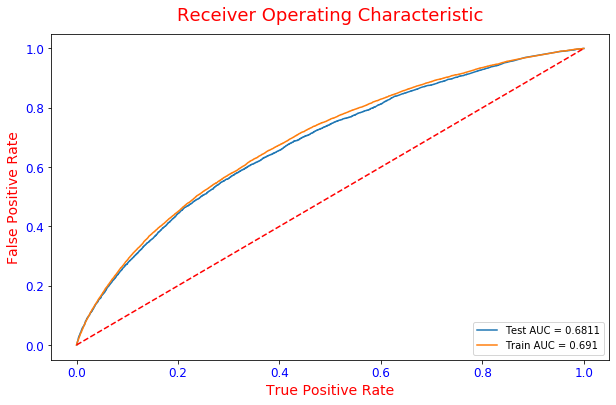

In [729]:
plot_auc(xgb, X_train= preliminary_train, X_test= preliminary_test, ytrain= ytrain, ytest= ytest )

In [736]:
modello= 'XGBoost_ADT'

filename = '/Users/federicofrancone/Desktop' + modello + '.sav'

pickle.dump(xgb, open(filename, 'wb'))

In [533]:
###### Export Proba ########
#export_proba(gb, filename= 'xgb')

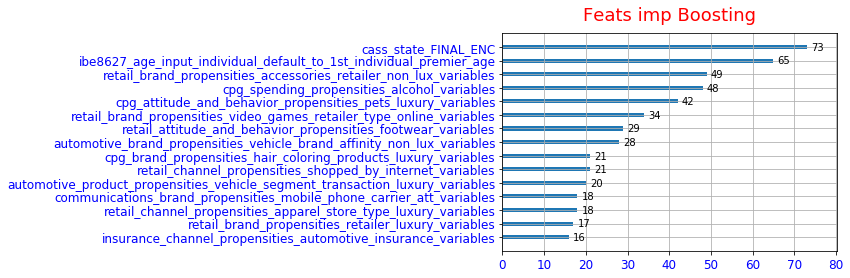

In [534]:
#plt.figure(figsize=(15,15))
plot_importance(gb.set_params(**best_gb.iloc[0]['diz_params']), height= 0.3, max_num_features= 15)
title_ticks_ecc('Feats imp Boosting', '', '', new_fig= False)

## <font color= 'orange'> Catboost

In [ ]:
import catboost as cb

catboost= cb.CatBoostClassifier(eval_metric="AUC", random_state=0 )

param_grid_cat = {'depth': [1, 2],
          'learning_rate' : [0.005, 0.05],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

#grid_catboost = run_model_no_val(estimator=catboost, param_grid= param_grid, catb= True, ) 

grid_catboost= run_model_no_val(estimator= catboost, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_grid_cat, catb= True) 
grid_catboost

## <font color= 'orange'> LightGBM

In [556]:
import lightgbm as lgb

gbm = lgb.LGBMClassifier(silent=False, eval_metric="AUC", random_state=0 )

param_grid_gbm = {"max_depth": [1, 2, 3],
              "learning_rate" : [0.001, 0.005, 0.009],
              "num_leaves": [50, 100],
              "n_estimators": [200]
             }


grid_gbm = run_model_no_val(estimator= gbm, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_grid_gbm, catb= False) 
grid_gbm

Shape di X_train e X_test sono:  (78436, 25) (33613, 25)

	 ITERATION 1/18 
	 Current Grid of Parameters is {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 50}

ROC Train is 0.6054, ROC Test is 0.601
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AUC', importance_type='split', learning_rate=0.001,
               max_depth=1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=50,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=False, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

	 ITERATION 2/18 
	 Current Grid of Parameters is {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 100}

ROC Train is 0.6054, ROC Test is 0.601
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AU

,diz_params,degree_overfitting(%),roc_train,roc_test
18,"{'learning_rate': 0.009, 'max_depth': 3, 'n_es...",0.90,0.6779,0.6689
17,"{'learning_rate': 0.009, 'max_depth': 3, 'n_es...",0.90,0.6779,0.6689
12,"{'learning_rate': 0.005, 'max_depth': 3, 'n_es...",0.62,0.6664,0.6602
11,"{'learning_rate': 0.005, 'max_depth': 3, 'n_es...",0.62,0.6664,0.6602
16,"{'learning_rate': 0.009, 'max_depth': 2, 'n_es...",0.54,0.6653,0.6599
15,"{'learning_rate': 0.009, 'max_depth': 2, 'n_es...",0.54,0.6653,0.6599
9,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.41,0.6561,0.6520
10,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.41,0.6561,0.6520
13,"{'learning_rate': 0.009, 'max_depth': 1, 'n_es...",0.12,0.6497,0.6485
14,"{'learning_rate': 0.009, 'max_depth': 1, 'n_es...",0.12,0.6497,0.6485


In [557]:
gbm = gbm.set_params(**grid_gbm.iloc[3]['diz_params'])

In [ ]:
#export_proba(gbm, filename= 'gbm')

# Feat Sel using GBM

## <font color= 'red'> Random Forest

In [152]:
rf= RandomForestClassifier(n_estimators= 10, criterion= 'gini', random_state=0, class_weight= 'balanced')

In [153]:
param_rf_gbm= {
    "criterion": ['gini'],
    "n_estimators" : [200], 
    "min_impurity_decrease" :  [1e-04, 1e-06],
    "min_samples_leaf": [20, 40], #30
    "max_depth": [2, 4, 6],
}  

best_rf_gbm = run_model_no_val(estimator=rf, param_grid= param_rf_gbm, X_train=preliminary_train_gbm, 
                                       X_test= preliminary_test_gbm)
best_rf_gbm

Shape di X_train e X_test sono:  (78436, 18) (33613, 18)

	 ITERATION 1/12 
	 Current Grid of Parameters is {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 20, 'n_estimators': 200}

ROC Train is 0.649, ROC Test is 0.6507
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

	 ITERATION 2/12 
	 Current Grid of Parameters is {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 40, 'n_estimators': 200}

ROC Train is 0.64

,diz_params,degree_overfitting(%),roc_train,roc_test
11,"{'criterion': 'gini', 'max_depth': 6, 'min_imp...",1.33,0.6887,0.6754
12,"{'criterion': 'gini', 'max_depth': 6, 'min_imp...",1.24,0.6877,0.6753
9,"{'criterion': 'gini', 'max_depth': 6, 'min_imp...",1.14,0.6864,0.6750
10,"{'criterion': 'gini', 'max_depth': 6, 'min_imp...",1.11,0.6861,0.6750
7,"{'criterion': 'gini', 'max_depth': 4, 'min_imp...",0.28,0.6690,0.6662
5,"{'criterion': 'gini', 'max_depth': 4, 'min_imp...",0.30,0.6691,0.6661
8,"{'criterion': 'gini', 'max_depth': 4, 'min_imp...",0.29,0.6689,0.6660
6,"{'criterion': 'gini', 'max_depth': 4, 'min_imp...",0.31,0.6690,0.6659
1,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",-0.17,0.6490,0.6507
2,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",-0.17,0.6490,0.6507


In [154]:
best_rf_gbm.iloc[0]['diz_params']

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 1e-06,
 'min_samples_leaf': 20,
 'n_estimators': 200}

## <font color= 'red'> XGBOOST

In [155]:
gb= XGBClassifier(random_state=0)  #multi:softmax , booster [default=gbtree], tree booster here because it always outperforms the linear booster and thus the later is rarely used.

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/


param_gb = {
    "learning_rate": [0.01, 0.005],
    "n_estimators" : [300], 
    "reg_alpha": [0.8], 
    "reg_lambda":[1],
    "max_depth": [1, 2],
    'min_child_weight': [1],  #Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence, it should be tuned using CV.
    'gamma': [1],  # aumentala per evitare overfitting: è il min delta della loss function per fare uno split
    'colsample_bytree': [1],
    'scale_pos_weight': [1],
    'subsample': [0.7]
                }

best_gb_gbm = run_model_no_val(estimator= gb, param_grid= param_gb, X_train=preliminary_train_gbm, 
                                       X_test= preliminary_test_gbm)
best_gb_gbm

Shape di X_train e X_test sono:  (78436, 18) (33613, 18)

	 ITERATION 1/4 
	 Current Grid of Parameters is {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.8, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.7}

ROC Train is 0.6505, ROC Test is 0.6512
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=1, learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=None, n_estimators=300,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0.8, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.7)

	 ITERATION 2/4 
	 Current Grid of Parameters is {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.8, 'reg_lambda': 1, 'scale_pos_weight': 1, 's

,diz_params,degree_overfitting(%),roc_train,roc_test
2,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.21,0.6677,0.6656
4,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.11,0.6582,0.6571
1,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",-0.07,0.6505,0.6512
3,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",-0.15,0.6395,0.6410


In [156]:
#gb= XGBClassifier(random_state=0)
#gb.set_params(**{'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 0.7, 'n_estimators': 300, 'reg_alpha': 0.8, 'reg_lambda': 0.8, 'scale_pos_weight': 0.8, 'subsample': 0.7})

In [157]:
###### Export Proba ########
#export_proba(gb, filename= 'xgb')

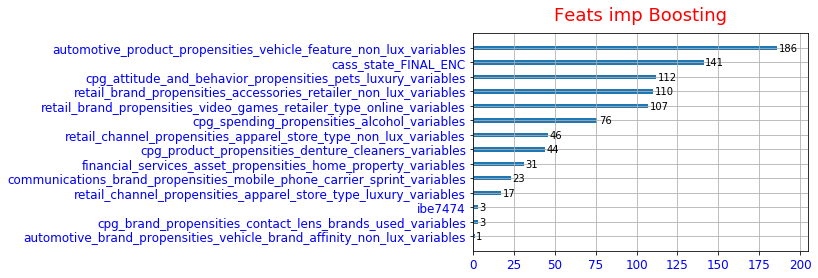

In [158]:
#plt.figure(figsize=(15,15))
plot_importance(gb.set_params(**best_gb.iloc[0]['diz_params']), height= 0.3, max_num_features= 15)
title_ticks_ecc('Feats imp Boosting', '', '', new_fig= False)

## <font color= 'orange'> Catboost

In [159]:
import catboost as cb

catboost= cb.CatBoostClassifier(eval_metric="AUC", random_state=0 )

param_grid_cat = {'depth': [1, 2],
          'learning_rate' : [0.005, 0.001],
         'l2_leaf_reg': [1,4,9],
         'iterations': [200]}

#grid_catboost = run_model_no_val(estimator=catboost, param_grid= param_grid, catb= True, ) 

grid_catboost_gbm= run_model_no_val(estimator= catboost, param_grid= param_grid_cat, catb= True, X_train=preliminary_train_gbm, 
                                       X_test= preliminary_test_gbm) 
grid_catboost_gbm

Shape di X_train e X_test sono:  (78436, 18) (33613, 18)

	 ITERATION 1/12 
	 Current Grid of Parameters is {'depth': 1, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.005}
0:	learn: 0.6905330	total: 21.7ms	remaining: 4.31s
1:	learn: 0.6879145	total: 41.8ms	remaining: 4.14s
2:	learn: 0.6853592	total: 60.7ms	remaining: 3.98s
3:	learn: 0.6828250	total: 80.8ms	remaining: 3.96s
4:	learn: 0.6803089	total: 99.8ms	remaining: 3.89s
5:	learn: 0.6778884	total: 117ms	remaining: 3.79s
6:	learn: 0.6754077	total: 139ms	remaining: 3.82s
7:	learn: 0.6729556	total: 159ms	remaining: 3.82s
8:	learn: 0.6705609	total: 179ms	remaining: 3.81s
9:	learn: 0.6681896	total: 199ms	remaining: 3.79s
10:	learn: 0.6658507	total: 221ms	remaining: 3.79s
11:	learn: 0.6635013	total: 241ms	remaining: 3.77s
12:	learn: 0.6612279	total: 264ms	remaining: 3.79s
13:	learn: 0.6589376	total: 285ms	remaining: 3.79s
14:	learn: 0.6566605	total: 307ms	remaining: 3.79s
15:	learn: 0.6544222	total: 327ms	remaining: 3.77s
16:	lea

,diz_params,degree_overfitting(%),roc_train,roc_test
7,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",-0.31,0.6552,0.6583
11,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",-0.25,0.6556,0.6581
9,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",-0.28,0.6539,0.6567
10,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",-0.36,0.6515,0.6551
12,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",-0.38,0.6506,0.6544
8,"{'depth': 2, 'iterations': 200, 'l2_leaf_reg':...",-0.40,0.6486,0.6526
6,"{'depth': 1, 'iterations': 200, 'l2_leaf_reg':...",-0.36,0.6483,0.6519
1,"{'depth': 1, 'iterations': 200, 'l2_leaf_reg':...",-0.41,0.6462,0.6503
3,"{'depth': 1, 'iterations': 200, 'l2_leaf_reg':...",-0.38,0.6464,0.6502
5,"{'depth': 1, 'iterations': 200, 'l2_leaf_reg':...",-0.36,0.6464,0.6500


In [ ]:
import catboost as cb

catboost= cb.CatBoostClassifier(eval_metric="AUC", random_state=0 )

param_grid_cat = {'depth': [3],
          'learning_rate' : [0.005, 0.00075],
         'l2_leaf_reg': [3,5,7],
         'iterations': [200]}

#grid_catboost = run_model_no_val(estimator=catboost, param_grid= param_grid, catb= True, ) 

grid_catboost_gbm= run_model_no_val(estimator= catboost, param_grid= param_grid_cat, catb= True, X_train=preliminary_train_gbm, 
                                       X_test= preliminary_test_gbm) 
grid_catboost_gbm

## <font color= 'orange'> LightGBM

In [161]:
import lightgbm as lgb

gbm = lgb.LGBMClassifier(silent=False, eval_metric="AUC", random_state=0 )

param_grid_gbm = {"max_depth": [1,2],
              "learning_rate" : [0.0005, 0.005],
              "num_leaves": [30, 50],  # max number of leaves
              "n_estimators": [200]
             }


grid_gbm = run_model_no_val(estimator= gbm, param_grid= param_grid_gbm, catb= False, 
                           X_train=preliminary_train_gbm, X_test= preliminary_test_gbm) 
grid_gbm

Shape di X_train e X_test sono:  (78436, 18) (33613, 18)

	 ITERATION 1/8 
	 Current Grid of Parameters is {'learning_rate': 0.0005, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 30}

ROC Train is 0.6052, ROC Test is 0.6056
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AUC', importance_type='split', learning_rate=0.0005,
               max_depth=1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=30,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=False, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

	 ITERATION 2/8 
	 Current Grid of Parameters is {'learning_rate': 0.0005, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 50}

ROC Train is 0.6052, ROC Test is 0.6056
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='

,diz_params,degree_overfitting(%),roc_train,roc_test
7,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.21,0.6572,0.6551
8,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.21,0.6572,0.6551
5,"{'learning_rate': 0.005, 'max_depth': 1, 'n_es...",-0.09,0.6392,0.6401
6,"{'learning_rate': 0.005, 'max_depth': 1, 'n_es...",-0.09,0.6392,0.6401
3,"{'learning_rate': 0.0005, 'max_depth': 2, 'n_e...",0.06,0.6317,0.6311
4,"{'learning_rate': 0.0005, 'max_depth': 2, 'n_e...",0.06,0.6317,0.6311
1,"{'learning_rate': 0.0005, 'max_depth': 1, 'n_e...",-0.04,0.6052,0.6056
2,"{'learning_rate': 0.0005, 'max_depth': 1, 'n_e...",-0.04,0.6052,0.6056


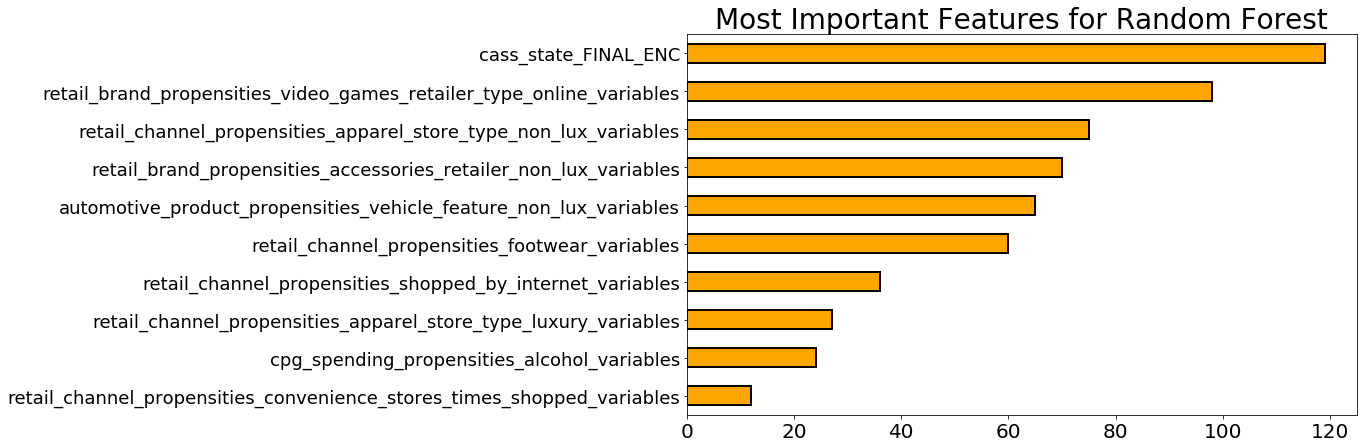

In [162]:
feats_imp_gbm2= plot_feat_imp_adj(gbm.set_params(**grid_gbm.iloc[0]['diz_params']), X_train= preliminary_train, X_test= preliminary_test, n_feat_to_plot= 10, color='orange', show= True)

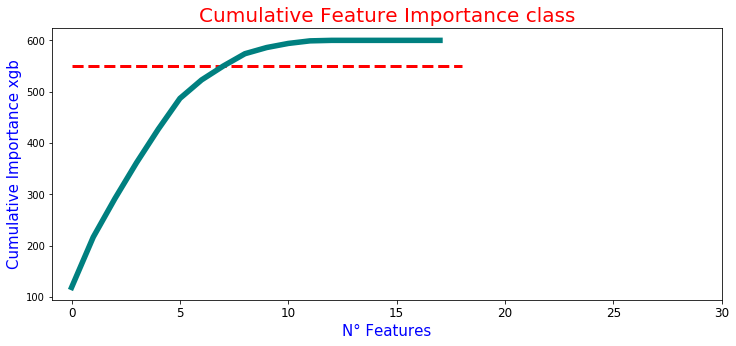

In [175]:
cumulative_importances = np.cumsum(feats_imp_gbm2 )
plt.figure(figsize=(12,5))
plt.plot(list(feats_imp_gbm2.index), cumulative_importances,'teal', lw=5.5 )
plt.title('Cumulative Feature Importance class', color= 'red', fontsize=20)
plt.hlines(y = 550, xmin=0, xmax=len(feats_imp_gbm2.importance), color = 'r', linestyles = 'dashed', lw=3 )
# Format x ticks and labels
plt.xticks(np.arange(0,31, 5), np.arange(0,31, 5),fontsize= 12 )
"""plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) """

        
plt.xlabel('N° Features', c= 'blue', fontsize= 15); 
plt.ylabel('Cumulative Importance xgb', fontsize=15, color= 'blue'); #plt.title('CUMULATIVE IMPORTANCES', fontsize=20)
#plt.savefig('Cumulative Feature importantce Importance', format= 'png')

In [164]:
only_imp_gbm2 = cumulative_importances[cumulative_importances['importance']<= 550].index
len(only_imp_gbm2)

8

In [165]:
X_train_imp= preliminary_train[only_imp_gbm2]
X_test_imp= preliminary_test[only_imp_gbm2]

param_grid_gbm = {"max_depth": [1,2],
              "learning_rate" : [0.01, 0.005],
              "num_leaves": [20, 40],  # max number of leaves
              "n_estimators": [200]
             }

gb_feat_gbm = run_model_no_val(gbm, param_grid= param_grid_gbm, only_imp= True, X_train= preliminary_train, X_test= preliminary_test,)
gb_feat_gbm

Shape di X_train e X_test sono:  (78436, 8) (33613, 8)

	 ITERATION 1/8 
	 Current Grid of Parameters is {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 20}

ROC Train is 0.6423, ROC Test is 0.643
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AUC', importance_type='split', learning_rate=0.01,
               max_depth=1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=20,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=False, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

	 ITERATION 2/8 
	 Current Grid of Parameters is {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 40}

ROC Train is 0.6423, ROC Test is 0.643
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AUC', impo

,diz_params,degree_overfitting(%),roc_train,roc_test
3,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.31,0.6518,0.6487
4,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.31,0.6518,0.6487
7,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.24,0.6478,0.6454
8,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.24,0.6478,0.6454
1,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",-0.07,0.6423,0.6430
2,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",-0.07,0.6423,0.6430
5,"{'learning_rate': 0.005, 'max_depth': 1, 'n_es...",-0.02,0.6397,0.6399
6,"{'learning_rate': 0.005, 'max_depth': 1, 'n_es...",-0.02,0.6397,0.6399


In [166]:
gbm = gbm.set_params(**grid_gbm.iloc[0]['diz_params'])

#export_proba(gbm, filename= 'gbm')

In [167]:
param_grid_gbm = {"max_depth": [1, 2],
              "learning_rate" : [0.001,0.005,0.01],
              "num_leaves": [20, 80],
              "n_estimators": [200]
             }


grid_gbm_red = run_model_no_val(estimator= gbm, param_grid= param_grid_gbm, only_imp= True) 
grid_gbm_red

Shape di X_train e X_test sono:  (78436, 8) (33613, 8)

	 ITERATION 1/12 
	 Current Grid of Parameters is {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 20}

ROC Train is 0.6252, ROC Test is 0.6243
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AUC', importance_type='split', learning_rate=0.001,
               max_depth=1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=20,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=False, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

	 ITERATION 2/12 
	 Current Grid of Parameters is {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200, 'num_leaves': 80}

ROC Train is 0.6252, ROC Test is 0.6243
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='AUC

,diz_params,degree_overfitting(%),roc_train,roc_test
11,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.31,0.6518,0.6487
12,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.31,0.6518,0.6487
7,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.24,0.6478,0.6454
8,"{'learning_rate': 0.005, 'max_depth': 2, 'n_es...",0.24,0.6478,0.6454
9,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",-0.07,0.6423,0.6430
10,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",-0.07,0.6423,0.6430
5,"{'learning_rate': 0.005, 'max_depth': 1, 'n_es...",-0.02,0.6397,0.6399
6,"{'learning_rate': 0.005, 'max_depth': 1, 'n_es...",-0.02,0.6397,0.6399
3,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.17,0.6365,0.6348
4,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.17,0.6365,0.6348


# Feat Sel using XGBoost

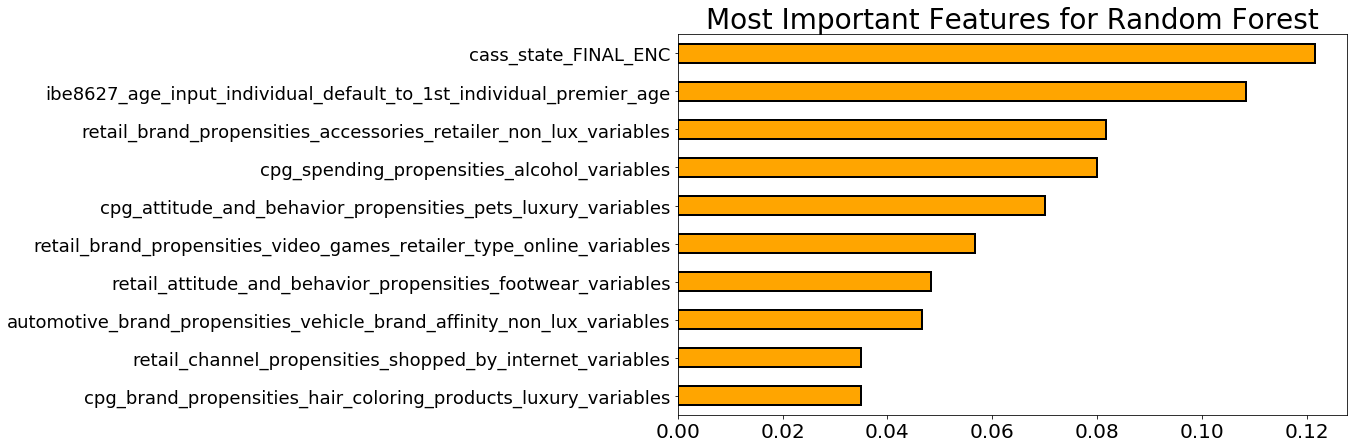

In [536]:
feats_imp_xgb= plot_feat_imp_adj(gb.set_params(**best_gb.iloc[0]['diz_params']), X_train= preliminary_train, X_test= preliminary_test, n_feat_to_plot= 10, color='orange', show= True)

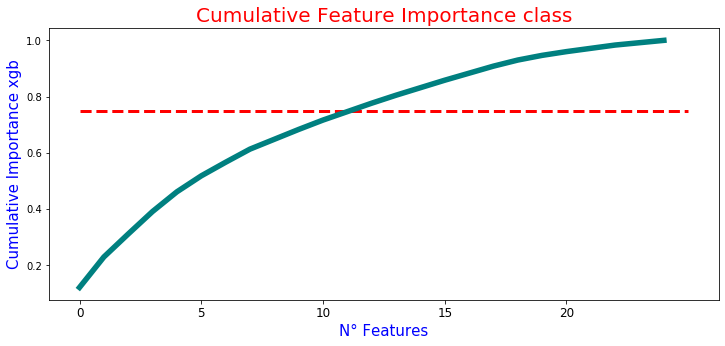

In [550]:
cumulative_importances = np.cumsum(feats_imp_xgb )
plt.figure(figsize=(12,5))
plt.plot(list(feats_imp_xgb.index), cumulative_importances,'teal', lw=5.5 )
plt.title('Cumulative Feature Importance class', color= 'red', fontsize=20)
plt.hlines(y = 0.75, xmin=0, xmax=len(feats_imp_xgb.importance), color = 'r', linestyles = 'dashed', lw=3 )
# Format x ticks and labels
plt.xticks(np.arange(0,25, 5), np.arange(0,25, 5),fontsize= 12 )
"""plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) """

        
plt.xlabel('N° Features', c= 'blue', fontsize= 15); 
plt.ylabel('Cumulative Importance xgb', fontsize=15, color= 'blue'); #plt.title('CUMULATIVE IMPORTANCES', fontsize=20)
#plt.savefig('Cumulative Feature importantce Importance', format= 'png')

In [551]:
only_imp_xgb = cumulative_importances[cumulative_importances['importance']<= 0.75].index
len(only_imp_xgb)

12

In [552]:
X_train_imp= preliminary_train[only_imp_xgb]
X_test_imp= preliminary_test[only_imp_xgb]

param_gb = {
    "learning_rate": [0.005, 0.001],
    "n_estimators" : [300], 
    "reg_alpha": [0.2], 
    "reg_lambda":[1],
    "max_depth": [1, 2],
    'min_child_weight': [1],  #Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence, it should be tuned using CV.
    'gamma': [1],  # aumentala per evitare overfitting: è il min delta della loss function per fare uno split
    'colsample_bytree': [1],
    'scale_pos_weight': [1],
    'subsample': [0.9]
                }

gb_feat_xgb= run_model_no_val(gb, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_gb, only_imp= True)
gb_feat_xgb

Shape di X_train e X_test sono:  (78436, 12) (33613, 12)

	 ITERATION 1/4 
	 Current Grid of Parameters is {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.005, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.9}

ROC Train is 0.6358, ROC Test is 0.6336
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=1, learning_rate=0.005,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0.2,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

	 ITERATION 2/4 
	 Current Grid of Parameters is {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.005, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 1, 'scale_p

,diz_params,degree_overfitting(%),roc_train,roc_test
2,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.57,0.6526,0.6469
1,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.22,0.6358,0.6336
4,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.49,0.6342,0.6293
3,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.25,0.6272,0.6247


In [ ]:
param_grid_cat = {'depth': [1,2,3],
          'learning_rate' : [0.005, 0.01],
         'l2_leaf_reg': [2,4,8],
         'iterations': [200]}

#grid_catboost = run_model_no_val(estimator=catboost, param_grid= param_grid, catb= True, ) 

grid_catboost = run_model_no_val(estimator=catboost, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_grid_cat, catb= True, only_imp= True ) #only_imp= True
grid_catboost

In [ ]:
param_grid_gbm = {"max_depth": [1,2],
              "learning_rate" : [0.001,0.005],
              "num_leaves": [20, 200],
              "n_estimators": [200]
             }


grid_gbm_red = run_model_no_val(estimator= gbm, X_train= preliminary_train, X_test= preliminary_test, param_grid= param_grid_gbm, only_imp= True) 
grid_gbm_red

<b> Saving Models

In [ ]:
all_models_class= {
            'rf': best_class_rf.best_estimator_,
            #'Knn': best_pca_knn_class},
            'xgboost': best_class_gb.best_estimator_, 
            'gb_old': best_class_gb_old.best_estimator_ ,
            'svm': best_lasso_svm_class,
                }

# save the model to disk

for modello in all_models_class:

    filename = 'best_models/' + modello + '_class' + '.sav'
    pickle.dump(all_models_class[modello], open(filename, 'wb'))

"""# load the model from disk 
prova = pickle.load(open(filename, 'rb'))
prova """